In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Muat dataset
wine = load_wine()

# Konversi dataset ke dalam DataFrame pandas
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Inisialisasi dan latih model pohon keputusan
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Prediksi kelas untuk data uji
y_pred = clf.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi: 0.9444444444444444

Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36




Matriks Kebingungan:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


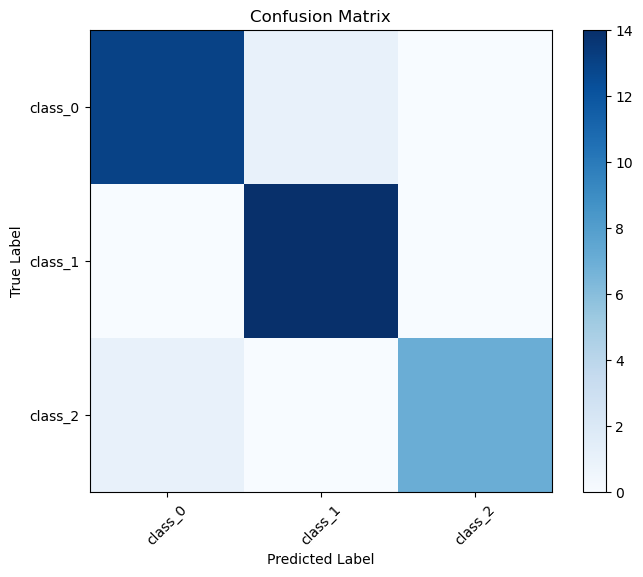

In [6]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nMatriks Kebingungan:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(wine.target_names))
plt.xticks(tick_marks, wine.target_names, rotation=45)
plt.yticks(tick_marks, wine.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


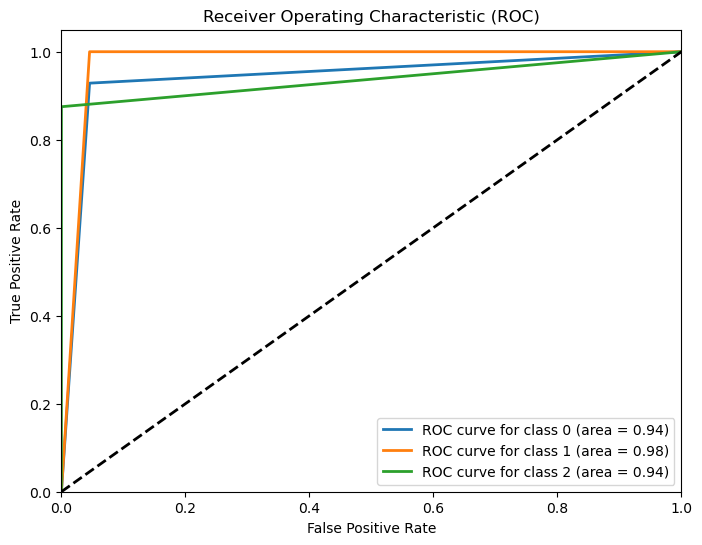

In [7]:
# Plot ROC Curve
y_probs = clf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(wine.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_probs[:, i])

plt.figure(figsize=(8, 6))
for i in range(len(wine.target_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='best')
plt.show()
